### Imports

In [11]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from pprint import pprint

from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay

Nesta seccção iremos comparar o comportamento de diversos ML models no conjunto de dados, analisar o comportamento dos
algoritmos calculando métricas de erro apropriadas e usando métodos de estimação do erro adequado. Por último pretendemos apresentar o melhor modelo.

In [ ]:
data=pd.read_csv("dataset.csv")
data

In [4]:
combinacao=pd.read_csv("combinacao.csv")
combinacao

,combinações
0,5-FU ABT-888
1,5-FU ABT-888
2,5-FU ABT-888
3,5-FU ABT-888
4,5-FU ABT-888
...,...
19585,ZOLINZA TOPOTECAN
19586,ZOLINZA TOPOTECAN
19587,ZOLINZA TOPOTECAN
19588,ZOLINZA TOPOTECAN


In [5]:
data["combinacao"]=combinacao["combinações"]
data

,Y,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,...,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,MACCSKey drug2 162,combinacao
0,7.693530,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5-FU ABT-888
1,7.778053,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5-FU ABT-888
2,-1.198505,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5-FU ABT-888
3,2.595684,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5-FU ABT-888
4,-5.139971,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5-FU ABT-888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,10.223066,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN
19586,20.551627,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN
19587,12.190316,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN
19588,23.438547,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN


Dividir o dataset em treino, teste, validação - 70,15,15 respetivamente. COm particular atenção para a distribuição estratificada de combinação de drogas

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('Y', axis=1)
y = data['Y']
combinacoes = data['combinacao']

X_train, X_temp, y_train, y_temp, comb_train, comb_temp = train_test_split(
    X, y, combinacoes, test_size=0.3, random_state=42, stratify=combinacoes
)

X_val, X_test, y_val, y_test, comb_val, comb_test = train_test_split(
    X_temp, y_temp, comb_temp, test_size=0.5, random_state=42, stratify=comb_temp
)

# Resultado
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_val:", X_val.shape)
print("Tamanho de X_test:", X_test.shape)


Tamanho de X_train: (13713, 9593)
Tamanho de X_val: (2938, 9593)
Tamanho de X_test: (2939, 9593)


Verificar que a proporção de combincação de drogas no dataset validação e teste é a mesma:

In [14]:
contagem_combinacao = X_val['combinacao'].value_counts()

contagem_especifica = contagem_combinacao.get("ABT-888 BEZ-235", 0)

print(f"A combinação 'ABT-888 BEZ-235' aparece {contagem_especifica} vezes na coluna 'combinacao'.")


A combinação 'ABT-888 BEZ-235' aparece 6 vezes na coluna 'combinacao'.


In [8]:
# Supondo que 'combinacao' é o nome da coluna
contagem_combinacao = X_test['combinacao'].value_counts()

# Agora você pode verificar a contagem específica para a combinação "ABT-888 BEZ-235"
contagem_especifica = contagem_combinacao.get("ABT-888 BEZ-235", 0)

print(f"A combinação 'ABT-888 BEZ-235' aparece {contagem_especifica} vezes na coluna 'combinacao'.")

A combinação 'ABT-888 BEZ-235' aparece 5 vezes na coluna 'combinacao'.


Para realizar o ML , necessitamos de retirar a coluna das combinações de drogas do dataset treino, validação e teste

In [15]:
X_train = X_train.iloc[:, :-1]
X_val = X_val.iloc[:, :-1]
X_test = X_test.iloc[:, :-1]

In [10]:
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Modelos de ML
A nossa task, prever o nivel de sinergia entre duas drogas, o que se trata de um problema de regressão, logo só poderemos utilizar modelos que se baseiem em regressão.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

models_to_try = [
    ('Linear Regression', LinearRegression()),
    ('KNN', KNeighborsRegressor()),
    #('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVM', SVR()),  # Support Vector Machine para regressão
    ('AdaBoost', AdaBoostRegressor())
]

results = []

for model_name, model in models_to_try:
    # Treinamento do modelo
    model.fit(X_train, y_train)
    
    # Avaliação do desempenho no conjunto de validação
    y_test_pred = model.predict(X_test)
    
    # Cálculo das métricas
    mse_val = mean_squared_error(y_test, y_test_pred)
    r2_val = r2_score(y_test, y_test_pred)
    mae_val = mean_absolute_error(y_test, y_test_pred)
    
    # Armazenar resultados em um dicionário
    model_results = {
        'Model': model_name,
        'Mean Squared Error': mse_val,
        'R-squared': r2_val,
        'Mean Absolute Error': mae_val,
    }
    
    # Adicionar os resultados à lista
    results.append(model_results)

    # Exibição dos resultados
    print(f'{model_name} - Mean Squared Error (Validation): {mse_val:.2f}')
    print(f'{model_name} - R Squared (Validation): {r2_val:.2f}')

# Converter a lista de resultados em um DataFrame do pandas (opcional)
results_df = pd.DataFrame(results)

# Encontrar o modelo com o menor MSE
best_model_df = results_df.loc[results_df['Mean Squared Error'].idxmin()]

# Exibir o melhor modelo
print(f'\nMelhor Modelo Escolhido:')
print(best_model_df)


Linear Regression - Mean Squared Error (Validation): 258.88
Linear Regression - R Squared (Validation): 0.23
KNN - Mean Squared Error (Validation): 259.69
KNN - R Squared (Validation): 0.23
Random Forest - Mean Squared Error (Validation): 168.21
Random Forest - R Squared (Validation): 0.50
SVM - Mean Squared Error (Validation): 237.46
SVM - R Squared (Validation): 0.30
AdaBoost - Mean Squared Error (Validation): 265.18
AdaBoost - R Squared (Validation): 0.21

Melhor Modelo Escolhido:
Model                  Random Forest
Mean Squared Error        168.209227
R-squared                   0.501247
Mean Absolute Error         9.185011
Name: 2, dtype: object


In [16]:
results

[{'Model': 'Linear Regression',
  'Mean Squared Error': 258.8832604608338,
  'R-squared': 0.23239112318820554,
  'Mean Absolute Error': 11.774471805897516},
 {'Model': 'KNN',
  'Mean Squared Error': 259.68584219178956,
  'R-squared': 0.23001140632295924,
  'Mean Absolute Error': 11.842198581126864},
 {'Model': 'Random Forest',
  'Mean Squared Error': 168.20922749875382,
  'R-squared': 0.5012466392772726,
  'Mean Absolute Error': 9.185011392752543},
 {'Model': 'SVM',
  'Mean Squared Error': 237.45851034130567,
  'R-squared': 0.2959171632494648,
  'Mean Absolute Error': 10.93998834874469},
 {'Model': 'AdaBoost',
  'Mean Squared Error': 265.1846913533264,
  'R-squared': 0.2137068935432178,
  'Mean Absolute Error': 12.027491938130904}]

O melhor modelo obtido foi o Random Forest, tendo em conta a métrica de R-squared, que quantifica o quanto a variação na variável de resposta pode ser explicada pelas variáveis explicativas no modelo. Comparando com o artigo de DeepSynergy, que usa como métrica MSE, métrica para avaliar a qualidade de um modelo de regressão, medindo a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais observados, sendo que quanto menor o MSE, melhor o modelo está em termos de ajuste aos dados, obtivemos um resultado inferior (MSE = 168,209) comparativamente ao artigo (MSE = 255)

# ensemble voting

In [15]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Escolha os modelos que deseja incluir no ensemble
model_linear = LinearRegression()
model_rf =  RandomForestRegressor()
model_svm = SVR()


# Crie um ensemble utilizando a média das previsões dos modelos
ensemble_model = VotingRegressor(estimators=[
    ('Linear Regression', model_linear),
    ('Random Forest', model_rf),
    ('Support Vector Machine', model_svm)
])

# Treine o ensemble
ensemble_model.fit(X_train, y_train)

# Faça previsões usando o ensemble
y_pred_ensemble = ensemble_model.predict(X_test)

# Avalie o desempenho do ensemble
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

# Exiba os resultados do ensemble
print(f'Ensemble - Mean Squared Error (Validation): {mse_ensemble:.2f}')
print(f'Ensemble - R-squared (Validation): {r2_ensemble:.2f}')
print(f'Ensemble - Mean Absolute Error (Validation): {mae_ensemble:.2f}')


Ensemble - Mean Squared Error (Validation): 203.64
Ensemble - R-squared (Validation): 0.40
Ensemble - Mean Absolute Error (Validation): 10.18


# Exploração de hiperparametros do melhor modelo

A nossa estratégia passou por treinar e avaliar um conjunto de modelos tendo em conta o dataset treino e teste , para depois utilizar o dataset da validação para otimizar os parametros do modelo que anteriormente deu melhores resultados. 

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


param_grid = {'n_estimators': [10, 50], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred_test_final = best_model.predict(X_test)
mse_test_final =mean_squared_error(y_test, y_pred_test_final)
r2_test_final = r2_score(y_test, y_pred_test_final)
mae_test_final= mean_absolute_error(y_test, y_pred_test_final)
print(f'Mean Squared Error (Test - Final): {mse_test_final:.2f}')
print(f'Mean Absolute Error (Test - Final): {mae_test_final:.2f}')
print(f' Rsquared (Test - Final): {r2_test_final:.2f}')


Mean Squared Error (Test - Final): 172.64
Mean Absolute Error (Test - Final): 9.33
 Rsquared (Test - Final): 0.49


In [17]:
best_model

RandomForestRegressor(min_samples_split=5, n_estimators=50)

## Model interpretation

scikit-learn provides multiple methods for model interpretation. Here we will see feature importance and permutation importance.


In [26]:
X = X.drop('combinacao', axis = 1)

In [27]:
from sklearn.feature_selection import VarianceThreshold

# Supondo que X é o seu conjunto de características
selector = VarianceThreshold(threshold=0.000000000001)
selected_X = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]

print("Shape do conjunto de características após aplicar o Variance Threshold:", selected_X.shape)
print("Colunas selecionadas:", selected_columns)

Shape do conjunto de características após aplicar o Variance Threshold: (19590, 9592)
Colunas selecionadas: Index(['Parametro 0', 'Parametro 1', 'Parametro 2', 'Parametro 3',
       'Parametro 4', 'Parametro 5', 'Parametro 6', 'Parametro 7',
       'Parametro 8', 'Parametro 9',
       ...
       'MACCSKey drug2 150', 'MACCSKey drug2 151', 'MACCSKey drug2 152',
       'MACCSKey drug2 153', 'MACCSKey drug2 154', 'MACCSKey drug2 155',
       'MACCSKey drug2 157', 'MACCSKey drug2 159', 'MACCSKey drug2 160',
       'MACCSKey drug2 162'],
      dtype='object', length=9592)


Existem features que apresentam mais importantes do que outras, no entanto não é uma diferença relevante, o que faz sentido o dataset termos um dataset tão composto e completo.

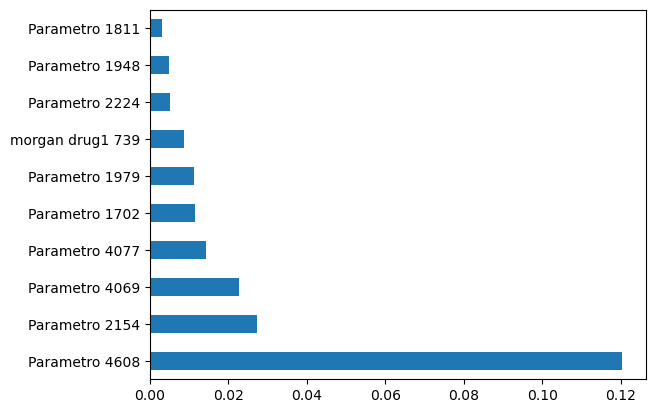

In [28]:
# Model interpretation
# feature importance

rf = best_model
rf.fit(X_train, y_train)
rf.feature_importances_

# plot feature importance
importances = pd.Series(rf.feature_importances_, index=selected_columns)  #este selected columns vão ser as selecionadas na feature selection, mas como não está importado não lê esta variável
importances.nlargest(10).plot(kind='barh')
plt.show()

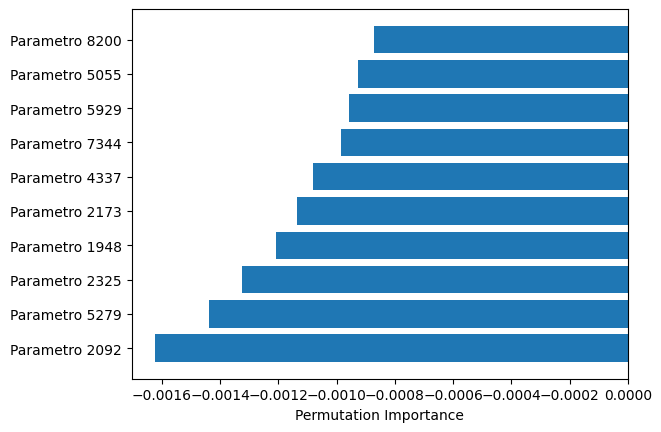

In [12]:
# feature importance based on permutation importance

perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(selected_columns[sorted_idx[:10]], perm_importance.importances_mean[sorted_idx[:10]])
plt.xlabel("Permutation Importance")
plt.show()

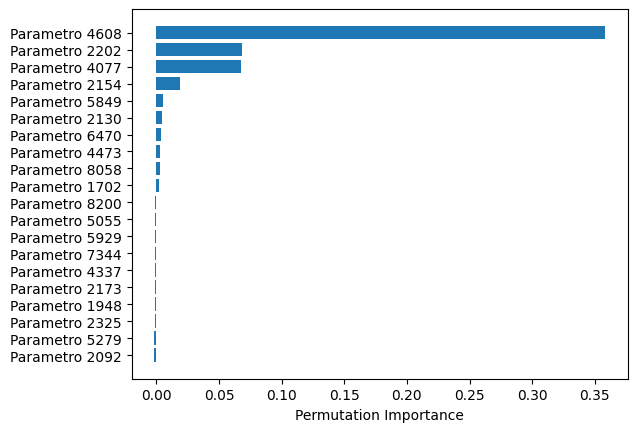

In [13]:

pos_neg_idx = np.concatenate((sorted_idx[:10], sorted_idx[-10:]))
plt.barh(selected_columns[pos_neg_idx], perm_importance.importances_mean[pos_neg_idx])
plt.xlabel("Permutation Importance")
plt.show()

Tendo em conta que existem features com mais importância do que outras, seria interessante implementar um modelo com atenção em Deep Learning, dando mais peso às features mais importantes.

Primeiramente, os dados foram divididos em conjuntos de treino, teste e validação para melhorar os resultados no ajuste do modelo. 

Foram treinados 5 modelos, nomeadamente Linear Regression, KNN, RF, SVM e AdaBoost. Verificamos que o modelo que apresentou melhor resultado nas métricas, nomeadamente R-squared, MSE e MAE, foi o Random Forest, onde se verificou que as características selecionadas são representativas da estrutura subjacente dos dados, e o modelo é capaz de generalizar bem para novos dados. Isso também pode indicar que o modelo não sofre de overfitting.

Depois fez-se a otimização de hiperparâmetros, onde não se verificou melhoria significativa, que na verdade, a pontuação diminuiu:
MSE (Inicial):      168.209227
MAE (Inicial) :    9.185011
R-squared (Inicial):    0.501247

MSE (Teste - Final): 172,64
MAE (Teste - Final): 9,33
R-squared (Teste - Final): 0,49

Por fim, verificou-se a importância de features, no entanto a diferença não era significativa, o que faz sentido pois  temos um dataset robusto, após todo o processamento.

